In [ ]:
!pip install kaggle

In [ ]:
#~/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()  # Select your kaggle.json file

Saving kaggle (6).json to kaggle (6).json


{'kaggle (6).json': b'{"username":"kithmilochana","key":"65a023dfb43cd3339c34cd85e1e00deb"}'}

In [ ]:
#!pip install kaggle
!mkdir -p ~/.kaggle
!mkdir -p /root/.kaggle # create /root/.kaggle if it doesn't exist
# If kaggle.json exists in /root/.kaggle you could skip the following line
!cp /content/kaggle.json /root/.kaggle/ # copy kaggle.json from upload
!chmod 600 /root/.kaggle/kaggle.json  # Ensure correct permissions

# **The Fix:** Create the required directory and move kaggle.json
import os
os.makedirs('/root/.config/kaggle', exist_ok=True) # create directory if it doesn't exist
!mv /root/.kaggle/kaggle.json /root/.config/kaggle/

#import kaggle
#kaggle.api.authenticate()
#kaggle.api.dataset_download_files('code/nilaychauhan/topic-modeling-of-news-articles-lda', path='.', unzip=True)

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
mv: cannot stat '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
kaggle.api.dataset_download_files('therohk/million-headlines',  path='.', unzip=True)

NameError: name 'kaggle' is not defined

In [ ]:
pip install requests

In [ ]:
import requests
url = "https://www.kaggle.com/datasets/therohk/million-headlines"
response = requests.get(url)

if response.status_code == 200:
    with open("kaggle_dataset.zip", "wb") as file:
        file.write(response.content)
        print("Dataset downloaded successfully.")
else:
    print("Failed to download the dataset. Status code:", response.status_code)
print(url)


Dataset downloaded successfully.
https://www.kaggle.com/datasets/therohk/million-headlines


In [86]:
#print first five rows in dataset

import pandas as pd

#print first five rows in dataset

import pandas as pd

# Assuming your dataset is in a CSV file named 'abcnews-date-text.csv'
try:
    df = pd.read_csv(r"/content/abcnews-date-text.csv")
    print(df.head()) # Corrected indentation: 4 spaces
except FileNotFoundError:
    print("Error: 'abcnews-date-text.csv' not found. Please make sure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    print("Error: 'abcnews-date-text.csv' not found. Please make sure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

   publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers


##Task 02

In [87]:
# Preprocess the text by performing the following:
# Remove stop words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import pandas as pd

try:
    df = pd.read_csv('abcnews-date-text.csv')

    # Function to remove stop words from a text
    def remove_stopwords(text):
        words = text.lower().split()
        filtered_words = [word for word in words if word not in stop_words]
        return " ".join(filtered_words)

    # Apply the function to the 'headline_text' column
    df['headline_text'] = df['headline_text'].apply(remove_stopwords)
    print(df.head())

except FileNotFoundError:
    print("Error: 'abcnews-date-text.csv' not found. Please make sure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   publish_date                               headline_text
0      20030219  aba decides community broadcasting licence
1      20030219    act fire witnesses must aware defamation
2      20030219    g calls infrastructure protection summit
3      20030219           air nz staff aust strike pay rise
4      20030219  air nz strike affect australian travellers


In [89]:
#Lemmatization or Stemming

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


try:
    df = pd.read_csv('abcnews-date-text.csv')

    # Initialize lemmatizer and stemmer
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    # Function to lemmatize and stem text
    def lemmatize_and_stem(text):
        words = text.lower().split()
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        stemmed_words = [stemmer.stem(word) for word in lemmatized_words]
        return " ".join(stemmed_words)

    # Apply the function to the 'headline_text' column
    df['headline_text'] = df['headline_text'].apply(lemmatize_and_stem)
    print(df.head())

except FileNotFoundError:
    print("Error: 'abcnews-date-text.csv' not found. Please make sure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


An unexpected error occurred: 'float' object has no attribute 'lower'


In [90]:
# Tokenization and creation of n-grams

from nltk import ngrams

try:
    df = pd.read_csv('abcnews-date-text.csv')

    def generate_ngrams(text, n):
        tokens = text.split()
        return list(ngrams(tokens, n))

    # Example usage for generating bigrams (n=2)
    df['bigrams'] = df['headline_text'].apply(lambda x: generate_ngrams(x, 2))
    print(df.head())

    # Example usage for generating trigrams (n=3)
    df['trigrams'] = df['headline_text'].apply(lambda x: generate_ngrams(x, 3))
    print(df.head())

except FileNotFoundError:
    print("Error: 'abcnews-date-text.csv' not found. Please make sure the file exists in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

   publish_date                                      headline_text  \
0      20030219  aba decides against community broadcasting lic...   
1      20030219     act fire witnesses must be aware of defamation   
2      20030219     a g calls for infrastructure protection summit   
3      20030219           air nz staff in aust strike for pay rise   
4      20030219      air nz strike to affect australian travellers   

                                             bigrams  
0  [(aba, decides), (decides, against), (against,...  
1  [(act, fire), (fire, witnesses), (witnesses, m...  
2  [(a, g), (g, calls), (calls, for), (for, infra...  
3  [(air, nz), (nz, staff), (staff, in), (in, aus...  
4  [(air, nz), (nz, strike), (strike, to), (to, a...  
   publish_date                                      headline_text  \
0      20030219  aba decides against community broadcasting lic...   
1      20030219     act fire witnesses must be aware of defamation   
2      20030219     a g calls for infra

In [91]:
# Remove any special characters or punctuation

import re

def remove_special_characters(text):
    # Remove special characters and punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    return text

try:
    df = pd.read_csv('abcnews-date-text.csv')

    # Apply the function to the 'headline_text' column
    df['headline_text'] = df['headline_text'].apply(remove_special_characters)
    print(df.head())

except FileNotFoundError:
    print("Error: 'abcnews-date-text.csv' not found. Please make sure the file exists in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


   publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers


##Task 03

In [92]:
import nltk

from nltk import pos_tag

from nltk.tokenize import word_tokenize

from collections import Counter



nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [98]:
# Apply POS tagging to the tokenized text
df['pos_tags'] = df['tokens']

# Display POS tags for the first few rows, using 'headline_text' instead of 'content'
print(df[['headline_text', 'pos_tags']].head())

                                       headline_text  \
0  aba decides against community broadcasting lic...   
1     act fire witnesses must be aware of defamation   
2     a g calls for infrastructure protection summit   
3           air nz staff in aust strike for pay rise   
4      air nz strike to affect australian travellers   

                                            pos_tags  
0  [aba, decides, against, community, broadcastin...  
1  [act, fire, witnesses, must, be, aware, of, de...  
2  [a, g, calls, for, infrastructure, protection,...  
3  [air, nz, staff, in, aust, strike, for, pay, r...  
4  [air, nz, strike, to, affect, australian, trav...  


In [99]:
# Display the first few entries in the 'pos_tags' column
print(df['pos_tags'].head())

0    [aba, decides, against, community, broadcastin...
1    [act, fire, witnesses, must, be, aware, of, de...
2    [a, g, calls, for, infrastructure, protection,...
3    [air, nz, staff, in, aust, strike, for, pay, r...
4    [air, nz, strike, to, affect, australian, trav...
Name: pos_tags, dtype: object


In [100]:
import collections

# Flatten the list of POS tags
all_pos_tags = [tag for sublist in df['pos_tags'] for tag in sublist]
tag_counts = Counter(all_pos_tags)
# Count the frequency of each POS tag
pos_tag_counts = collections.Counter(all_pos_tags)
print(pos_tag_counts.most_common(10))

[('to', 238379), ('in', 156203), ('for', 143278), ('of', 95941), ('on', 82062), ('the', 65067), ('over', 54546), ('police', 39850), ('at', 36895), ('with', 36333)]


In [101]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#Due to the dataset huge in this code get long time
#import spacy
#from spacy import displacy

# Load the spaCy English model
#nlp = spacy.load("en_core_web_sm")

# Process each headline and render it
#for index, row in df.iterrows():
#    headline = row['headline_text']
#    doc = nlp(headline)  # Create a spaCy Doc object
#    displacy.render(doc, style="ent")

In [102]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [103]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [104]:
import pandas as pd

# Assuming your dataset is in a pandas DataFrame called 'df' with a 'headline_text' column
# Replace 'headline_text' with the actual column name containing your text data

for index, row in df.head().iterrows():  # Process only the first few rows
    headline = row['headline_text']
    doc = nlp(headline)

    for ent in doc.ents:
        print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: aba, Label: PERSON
Entity: air nz staff, Label: ORG
Entity: australian, Label: NORP


In [105]:
import spacy
from spacy import displacy  # Import displacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

for index, row in df.head().iterrows():  # Process only the first few rows
    headline = row['headline_text']
    doc = nlp(headline)  # Create a spaCy Doc object
    displacy.render(doc, style="ent")

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


##Task 4: Sentiment Analysis

In [106]:
!pip install textblob vaderSentiment #Install necessary libraries

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.1 MB/s eta 0:00:00


In [107]:
# Import libraries and load data
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd

# Assuming your dataset is in a pandas DataFrame called 'df' with a 'headline_text' column
# Replace 'headline_text' with the actual column name containing your text data
df = pd.read_csv('abcnews-date-text.csv')  # Replace 'abcnews-date-text.csv' with the actual file name

# Perform sentiment analysis using TextBlob for the first 10 rows
df['textblob_sentiment'] = df['headline_text'][:10].apply(lambda text: TextBlob(text).sentiment.polarity)

# Perform sentiment analysis using VADER for the first 10 rows
analyzer = SentimentIntensityAnalyzer()
df['vader_sentiment'] = df['headline_text'][:10].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Display the first 10 rows with sentiment scores
print(df[['headline_text', 'textblob_sentiment', 'vader_sentiment']].head(10))

                                       headline_text  textblob_sentiment  \
0  aba decides against community broadcasting lic...               0.000   
1     act fire witnesses must be aware of defamation               0.250   
2     a g calls for infrastructure protection summit               0.000   
3           air nz staff in aust strike for pay rise               0.000   
4      air nz strike to affect australian travellers               0.000   
5                  ambitious olsson wins triple jump               0.275   
6         antic delighted with record breaking barca               0.700   
7  aussie qualifier stosur wastes four memphis match              -0.200   
8       aust addresses un security council over iraq               0.000   
9         australia is locked into war timetable opp               0.000   

   vader_sentiment  
0           0.0000  
1          -0.3400  
2           0.0000  
3          -0.2263  
4          -0.1280  
5           0.7783  
6           0.51

In [108]:
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('abcnews-date-text.csv')
# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Function to classify sentiment using VADER
def classify_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    compound_score = analyzer.polarity_scores(text)['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification functions to the first 10 rows of the DataFrame
df['textblob_sentiment_class'] = df['headline_text'][:10].apply(classify_sentiment_textblob)
df['vader_sentiment_class'] = df['headline_text'][:10].apply(classify_sentiment_vader)

# Display the first 10 rows with sentiment classifications
print(df[['headline_text', 'textblob_sentiment_class', 'vader_sentiment_class']].head(10))

# Calculate sentiment distribution for the first 10 rows
textblob_distribution = df['textblob_sentiment_class'][:10].value_counts(normalize=True) * 100
vader_distribution = df['vader_sentiment_class'][:10].value_counts(normalize=True) * 100

# Print sentiment distribution for the first 10 rows
print("\nTextBlob Sentiment Distribution (First 10 rows):")
print(textblob_distribution)
print("\nVADER Sentiment Distribution (First 10 rows):")
print(vader_distribution)

                                       headline_text textblob_sentiment_class  \
0  aba decides against community broadcasting lic...                  Neutral   
1     act fire witnesses must be aware of defamation                 Positive   
2     a g calls for infrastructure protection summit                  Neutral   
3           air nz staff in aust strike for pay rise                  Neutral   
4      air nz strike to affect australian travellers                  Neutral   
5                  ambitious olsson wins triple jump                 Positive   
6         antic delighted with record breaking barca                 Positive   
7  aussie qualifier stosur wastes four memphis match                 Negative   
8       aust addresses un security council over iraq                  Neutral   
9         australia is locked into war timetable opp                  Neutral   

  vader_sentiment_class  
0               Neutral  
1              Negative  
2               Neutral  
3   

##Task 05

In [110]:
#Install necessary libraries
!pip install gensim pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.9 MB/s eta 0:00:00


In [111]:
# Import libraries and load data
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models

# Assuming your dataset is in a pandas DataFrame called 'df' with a 'headline_text' column
# Replace 'headline_text' with the actual column name containing your text data
df = pd.read_csv('abcnews-date-text.csv')

In [112]:
# Preprocess the text data

# Tokenize the text data
df['tokens'] = df['headline_text'].apply(lambda x: x.lower().split())

# Create a dictionary from the tokenized data
dictionary = corpora.Dictionary(df['tokens'])

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
# Train the LDA model

# Set the number of topics you want to extract
num_topics = 5  #  can adjust this number

# Train the LDA model
lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
# Visualize the topics

# Visualize the topics using pyLDAvis
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Assuming you have already trained the LDA model (lda_model) and have the dictionary (dictionary)

# Get the topics and keywords
topics = lda_model.print_topics(num_words=10)  # Get top 10 keywords for each topic

# Print the topics and keywords
for topic in topics:
    print(f"Topic #{topic[0]}: {topic[1]}")

# Discussion of topic representation:


Topic #0: 0.081*"of" + 0.042*"covid" + 0.025*"19" + 0.023*"in" + 0.010*"coronavirus" + 0.010*"election" + 0.010*"us" + 0.009*"and" + 0.007*"border" + 0.007*"with"
Topic #1: 0.042*"to" + 0.015*"coronavirus" + 0.014*"a" + 0.013*"cases" + 0.013*"in" + 0.012*"says" + 0.011*"australia" + 0.009*"be" + 0.009*"china" + 0.008*"will"
Topic #2: 0.066*"the" + 0.026*"to" + 0.019*"for" + 0.016*"queensland" + 0.015*"on" + 0.013*"trump" + 0.010*"coronavirus" + 0.009*"nsw" + 0.008*"and" + 0.008*"a"
Topic #3: 0.041*"to" + 0.020*"for" + 0.019*"in" + 0.016*"coronavirus" + 0.014*"australian" + 0.014*"victoria" + 0.013*"new" + 0.011*"government" + 0.010*"vaccine" + 0.010*"nsw"
Topic #4: 0.039*"in" + 0.023*"after" + 0.020*"over" + 0.019*"police" + 0.012*"man" + 0.011*"at" + 0.010*"with" + 0.009*"for" + 0.008*"court" + 0.008*"lockdown"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Task 06:

In [116]:
# Install necessary libraries

!pip install scikit-learn matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
# import libraries and load data

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('abcnews-date-text.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
# Feature extraction using TF-IDF

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Fit the vectorizer to your text data
tfidf_matrix = vectorizer.fit_transform(df['headline_text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
#  Dimensionality reduction using PCA

# Create a PCA object
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization

# Fit PCA to the TF-IDF matrix
principal_components = pca.fit_transform(tfidf_matrix.toarray())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
#  Clustering using K-Means

# Create a KMeans object
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters

# Fit KMeans to the principal components
clusters = kmeans.fit_predict(principal_components)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


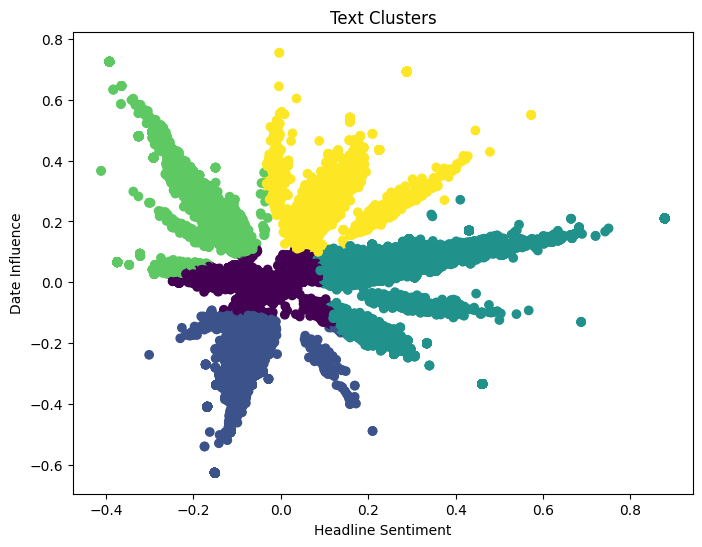

In [121]:
# Visualization using scatterplot

# Create a scatterplot of the principal components, colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters)
plt.title('Text Clusters')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
plt.xlabel('Headline Sentiment')  # Replace with meaningful label for PC1
plt.ylabel('Date Influence')     # Replace with meaningful label for PC2


# If you have an 'author' column, you can label the points with author names
# for i, author in enumerate(df['author']):
#     plt.annotate(author, (principal_components[i, 0], principal_components[i, 1]))

plt.show()

##Task 07:

In [122]:
# install necessary libraries
!pip install gensim scikit-learn matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
#  Import libraries and load data

import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('abcnews-date-text.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
# Prepare the data

# Tokenize the text data
df['tokens'] = df['headline_text'].apply(lambda x: x.lower().split())

# Train Word2Vec model
model = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
#  Generate document vectors

# Function to get document vector by averaging word vectors
def get_doc_vector(tokens):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0] * model.vector_size  # Return a zero vector if no words are found

df['doc_vector'] = df['tokens'].apply(get_doc_vector)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
df['cluster'] = kmeans.fit_predict(list(df['doc_vector']))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


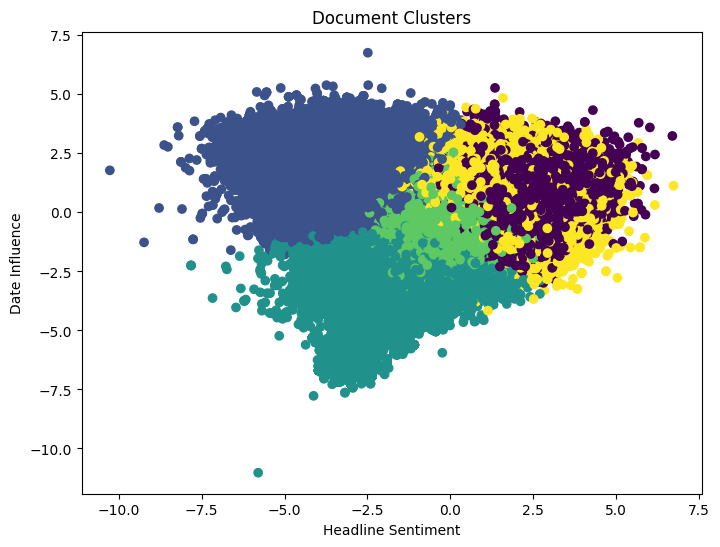

In [128]:
#  Visualize the clusters

# Reduce dimensionality for visualization (using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(list(df['doc_vector']))

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'])
plt.title('Document Clusters')
plt.xlabel('Headline Sentiment')  # Replace with meaningful label for PC1
plt.ylabel('Date Influence')   # Replace with meaningful label for PC2
plt.show()

##Task 08

In [1]:
# Install spaCy and download the English language model:

!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
#  Import spaCy and load the model:

import spacy

nlp = spacy.load("en_core_web_sm")

In [3]:
# Parse a subset of your dataset:

import pandas as pd

df = pd.read_csv('abcnews-date-text.csv')  # Assuming your data is in a CSV file

# Process only the first few rows
for index, row in df.head(10).iterrows():
    headline = row['headline_text']
    doc = nlp(headline)  # Process the text with spaCy

    # Print dependency information for each token
    for token in doc:
        print(f"{token.text} --> {token.dep_} --> {token.head.text}")

aba --> nsubj --> decides
decides --> ROOT --> decides
against --> prep --> decides
community --> compound --> broadcasting
broadcasting --> compound --> licence
licence --> pobj --> against
act --> compound --> witnesses
fire --> compound --> witnesses
witnesses --> nsubj --> be
must --> aux --> be
be --> ROOT --> be
aware --> acomp --> be
of --> prep --> aware
defamation --> pobj --> of
a --> det --> calls
g --> compound --> calls
calls --> ROOT --> calls
for --> prep --> calls
infrastructure --> compound --> protection
protection --> compound --> summit
summit --> pobj --> for
air --> compound --> nz
nz --> compound --> staff
staff --> ROOT --> staff
in --> prep --> staff
aust --> amod --> strike
strike --> pobj --> in
for --> prep --> strike
pay --> compound --> rise
rise --> pobj --> for
air --> compound --> nz
nz --> nsubj --> strike
strike --> ROOT --> strike
to --> aux --> affect
affect --> xcomp --> strike
australian --> amod --> travellers
travellers --> dobj --> affect
ambit

In [4]:
# Create visual representations using displacy:

from spacy import displacy

for index, row in df.head(10).iterrows():
    headline = row['headline_text']
    doc = nlp(headline)
    displacy.render(doc, style="dep", jupyter=True)  # Display in Colab

##Bonus Task

In [5]:
#  Install necessary libraries:

!pip install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.9 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21692 sha256=253cff253f19a9340d555bd55bb50b125c49f83b990c6874b56822e6fd860606
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=b94ecb99e772055ea95715e7f6a4b489eb6264865f53b69eb2ef6fb8ef795ffe
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [6]:
#  Import libraries and load data:

import pandas as pd
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer


In [8]:
# Implement text summarization:

df = pd.read_csv('abcnews-date-text.csv')

# Initialize the LSA summarizer
summarizer = LsaSummarizer

In [10]:
import nltk
nltk.download('punkt_tab')
import pandas as pd
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer # or LexRankSummarizer, LuhnSummarizer, etc.


# Implement text summarization:

# Select a sample headline for summarization
headline = df['headline_text'][0]  # You can choose any headline

# Create a parser object
parser = PlaintextParser.from_string(headline, Tokenizer("english"))

# Create a summarizer object
summarizer = LsaSummarizer()  # Using LexRank algorithm

# Get the summary
summary = summarizer(parser.document, sentences_count=2)  # Get 2 summary sentences

# Print the summary
for sentence in summary:
    print(sentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


aba decides against community broadcasting licence
